# Notes on the Simplex

In [1]:
import numpy as np
import pandas as pd
%matplotlib widget

# Simplex in Probability Theory

A probability simplex is a geometric representation of the probabilities of a finite set of outcomes. It's particularly important in the context of categorical distributions, where you have a finite number of discrete outcomes, each with a certain probability.

In an n-class categorical distribution, the probability simplex is an (n−1)-dimensional simplex. Each point in this simplex represents a possible distribution of probability across the 
n over the classes, where the sum of probabilities is equal to 1. 



## Simplex by Example: 2D 


In a 2-class problem (binary classification), the probability simplex is a line segment (1-simplex). Each point on the line represents a different probability distribution between the two classes, where the sum of probabilities is 1.


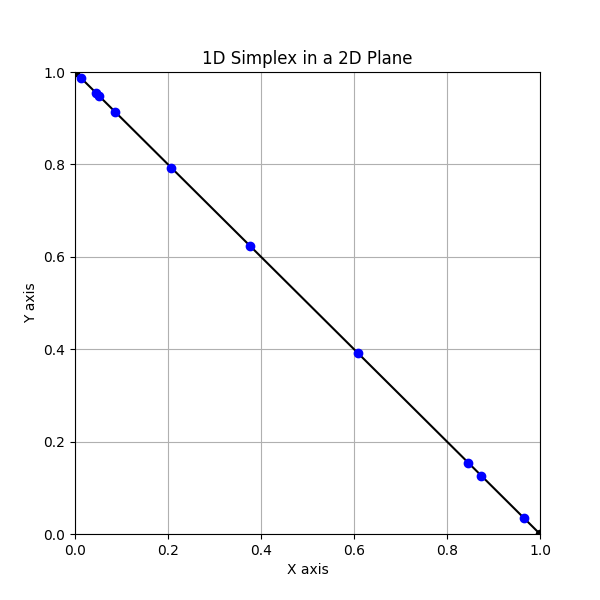

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the 2D plane
plt.figure(figsize=(6, 6))
plt.xlim(0, 1)
plt.ylim(0, 1)

# Draw a line from (0, 1) to (1, 0)
plt.plot([0, 1], [1, 0], 'o-', color='black')

# Plot random points on the line
for _ in range(10):
    # Generate a random value for x and calculate corresponding y
    x = np.random.rand()
    y = 1 - x
    plt.plot(x, y, 'o', color='blue')

plt.title('1D Simplex in a 2D Plane')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()


## Simplex by Example: 3D 

In a 3-class problem, the probability simplex is a triangle (2-simplex). Each point inside the triangle represents a different set of probabilities for the three classes, where the sum of the probabilities is 1.


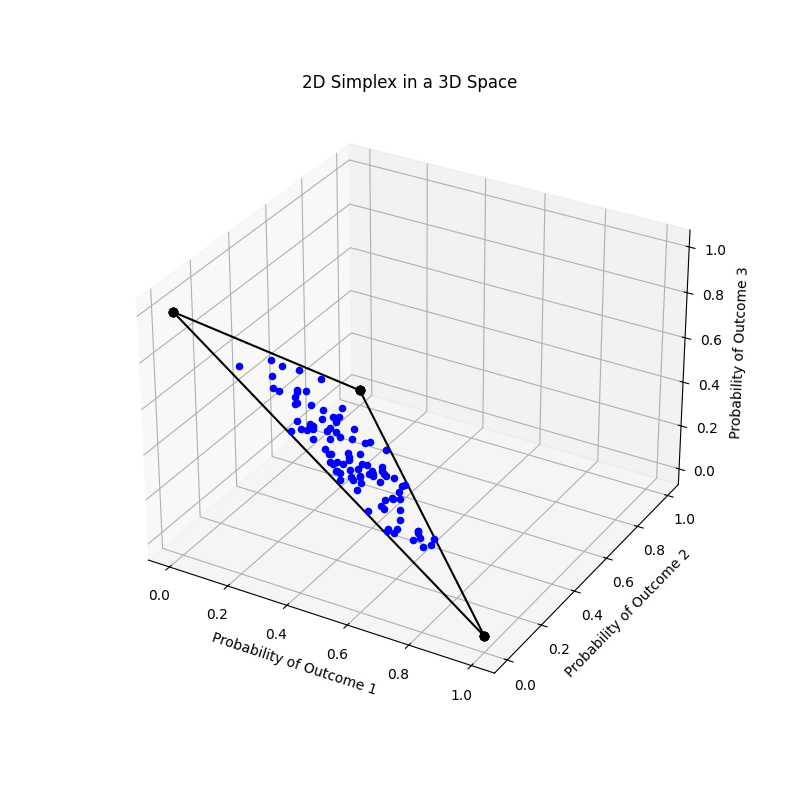

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Set up the 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Vertices of the triangle (2D simplex) in 3D space
vertices = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Draw the triangle (2D simplex)
# Connecting the vertices
for i in range(3):
    for j in range(i, 3):
        ax.plot([vertices[i, 0], vertices[j, 0]],
                [vertices[i, 1], vertices[j, 1]],
                [vertices[i, 2], vertices[j, 2]],
                'o-', color='black')

# Plot random points inside the triangle
for _ in range(100):
    # Random weights that sum to 1
    weights = np.random.rand(3)
    weights /= np.sum(weights)

    # Point inside the simplex
    # point = weights @ vertices
    point = weights
    ax.scatter(point[0], point[1], point[2], color='blue')

ax.set_xlabel('Probability of Outcome 1')
ax.set_ylabel('Probability of Outcome 2')
ax.set_zlabel('Probability of Outcome 3')
plt.title('2D Simplex in a 3D Space')
plt.show()


In a 4-class problem, the probability simplex is a tetrahedron (3-simplex), and so on.

## Simplex in Machine Learning

In multiclass classification problems, the outputs of models are often interpreted as probabilities of belonging to each class. These outputs are typically constrained to lie within the probability simplex to ensure they represent valid probability distributions.

### Constraining NN layers to the simplex with softmax

A common way to achieve this constraint is through the softmax function, which takes a vector of arbitrary real-valued scores (logits) and converts them into a probability distribution that lies on the simplex.

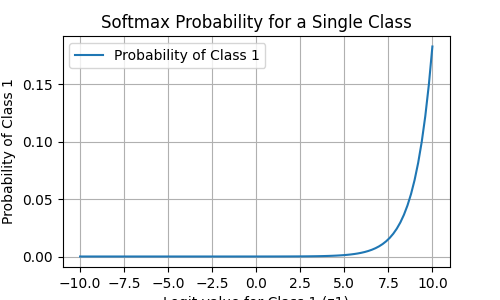

In [4]:
def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / e_z.sum(axis=0)


# Create a range of values for the first component of the vector (logit for class 1)
z1_values = np.linspace(-10, 10, 100)

# Calculate softmax probabilities for class 1
softmax_prob_class_1 = softmax(z1_values)

# Plotting
plt.figure(figsize=(5,3))
plt.plot(z1_values, softmax_prob_class_1, label='Probability of Class 1')
plt.xlabel('Logit value for Class 1 (z1)')
plt.ylabel('Probability of Class 1')
plt.title('Softmax Probability for a Single Class')
plt.legend()
plt.grid(True)
plt.show()


Here's an example code snippet that takes a NumPy array of 10 random integers in the range 0 to 100, and then applies the softmax function to transform these values into a probability distribution (simplex) of size 9:

In [5]:
# Generate an array of 10 random integers between 0 and 100
logits = np.random.randint(0, 100, 10)

# Apply softmax to the logits
probabilities = softmax(logits)

print(f"Sum of probabilities: {sum(probabilities)}")

# Print the original logits and the resulting probabilities
(logits, probabilities)

Sum of probabilities: 0.9999999999999999


(array([46, 40, 79, 78, 31, 97, 82, 87, 81, 36]),
 array([7.09514893e-23, 1.75871158e-25, 1.52292816e-08, 5.60253962e-09,
        2.17042252e-29, 9.99954163e-01, 3.05888299e-07, 4.53978488e-05,
        1.12530016e-07, 3.22119263e-27]))